In [63]:
#All the libralies used in this project
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Data Understanding & EDA & Visualization

In [64]:
data = pd.read_csv("diamonds.csv")
data.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75


In [65]:
data.tail()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
53935,0.72,b'Ideal',b'D',b'SI1',60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,b'Good',b'D',b'SI1',63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,b'Very Good',b'D',b'SI1',62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,b'Premium',b'H',b'SI2',61.0,58.0,2757.0,6.15,6.12,3.74
53939,0.75,b'Ideal',b'D',b'SI2',62.2,55.0,2757.0,5.83,5.87,3.64


In [66]:
data.shape

(53940, 10)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [68]:
data.describe()

,carat,depth,table,price,'x','y','z'
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [69]:
data.duplicated().sum()

146

In [70]:
# Print the duplicate rows
duplicate_rows = data[data.duplicated(keep=False)]
print(duplicate_rows)

       carat       cut color  clarity  depth  table   price   'x'   'y'   'z'
1004    0.79  b'Ideal'  b'G'   b'SI1'   62.3   57.0  2898.0  5.90  5.85  3.66
1005    0.79  b'Ideal'  b'G'   b'SI1'   62.3   57.0  2898.0  5.90  5.85  3.66
1006    0.79  b'Ideal'  b'G'   b'SI1'   62.3   57.0  2898.0  5.90  5.85  3.66
1007    0.79  b'Ideal'  b'G'   b'SI1'   62.3   57.0  2898.0  5.90  5.85  3.66
1008    0.79  b'Ideal'  b'G'   b'SI1'   62.3   57.0  2898.0  5.90  5.85  3.66
...      ...       ...   ...      ...    ...    ...     ...   ...   ...   ...
49557   0.71   b'Good'  b'F'   b'SI2'   64.1   60.0  2130.0  0.00  0.00  0.00
50078   0.51  b'Ideal'  b'F'  b'VVS2'   61.2   56.0  2203.0  5.19  5.17  3.17
50079   0.51  b'Ideal'  b'F'  b'VVS2'   61.2   56.0  2203.0  5.19  5.17  3.17
52860   0.50   b'Fair'  b'E'   b'VS2'   79.0   73.0  2579.0  5.21  5.18  4.09
52861   0.50   b'Fair'  b'E'   b'VS2'   79.0   73.0  2579.0  5.21  5.18  4.09

[289 rows x 10 columns]


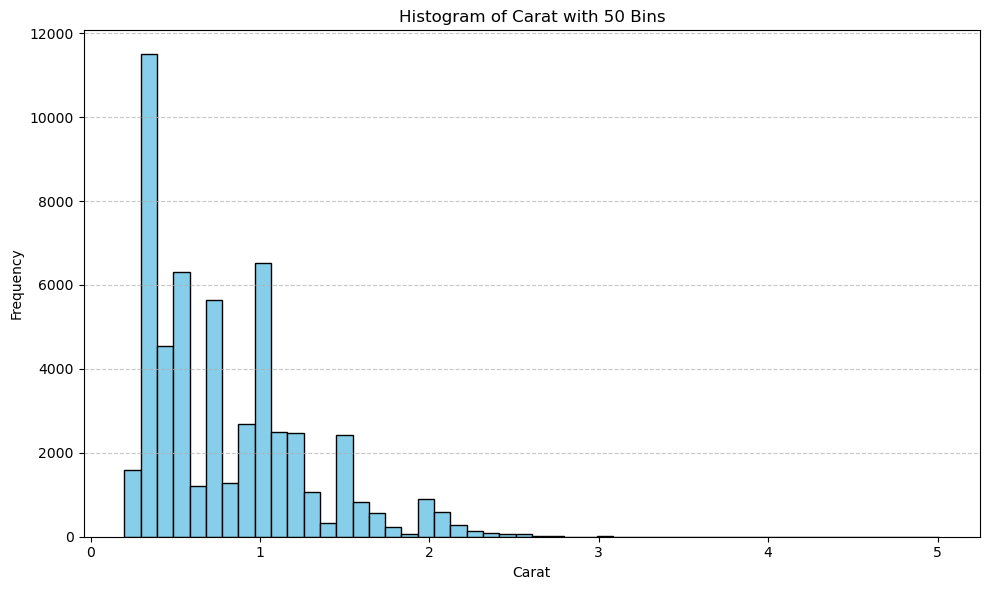

In [71]:
# Create a histogram with a bin size of 50 for the 'carat' attribute
plt.figure(figsize=(10, 6))
plt.hist(data['carat'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.title('Histogram of Carat with 50 Bins')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

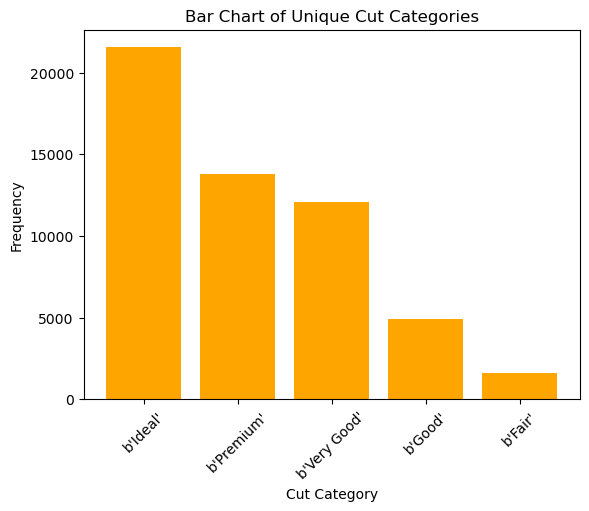

In [72]:
unique_categories = data['cut'].value_counts()

# Create a bar chart
plt.bar(unique_categories.index, unique_categories.values, color='orange')

# Add labels and a title
plt.xlabel('Cut Category')
plt.ylabel('Frequency')
plt.title('Bar Chart of Unique Cut Categories')

# Explicitly set the x-axis ticks to include all unique categories
plt.xticks(unique_categories.index, rotation=45)

# Show the plot
plt.show()

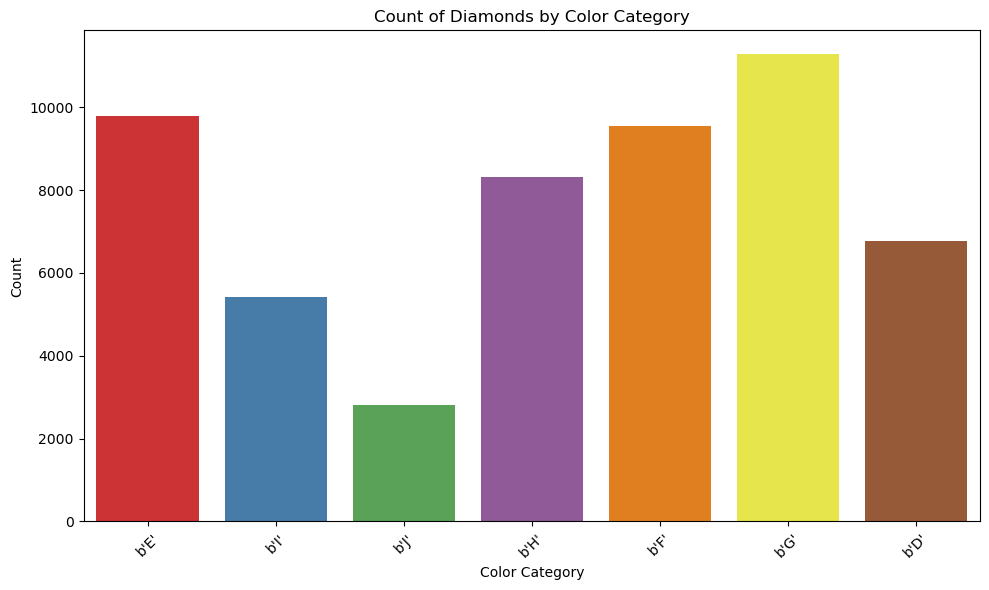

In [73]:
# Create a bar plot of color categories
plt.figure(figsize=(10, 6))
sns.countplot(x='color', data=data, palette='Set1') 
plt.xlabel('Color Category')
plt.ylabel('Count')
plt.title('Count of Diamonds by Color Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

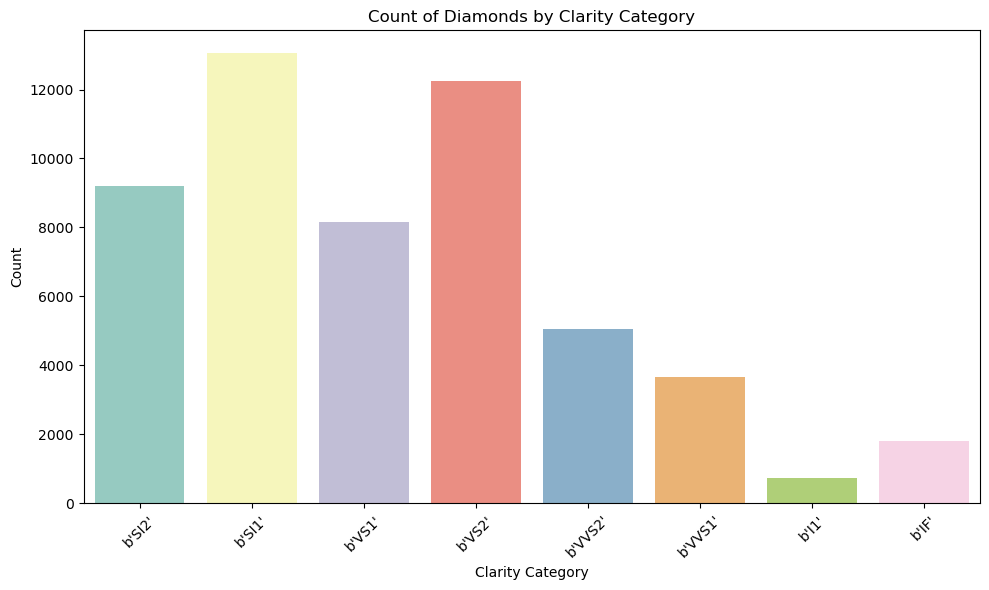

In [74]:
# Create a bar plot of clarity categories
plt.figure(figsize=(10, 6))
sns.countplot(x='clarity', data=data, palette='Set3')  
plt.xlabel('Clarity Category')
plt.ylabel('Count')
plt.title('Count of Diamonds by Clarity Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

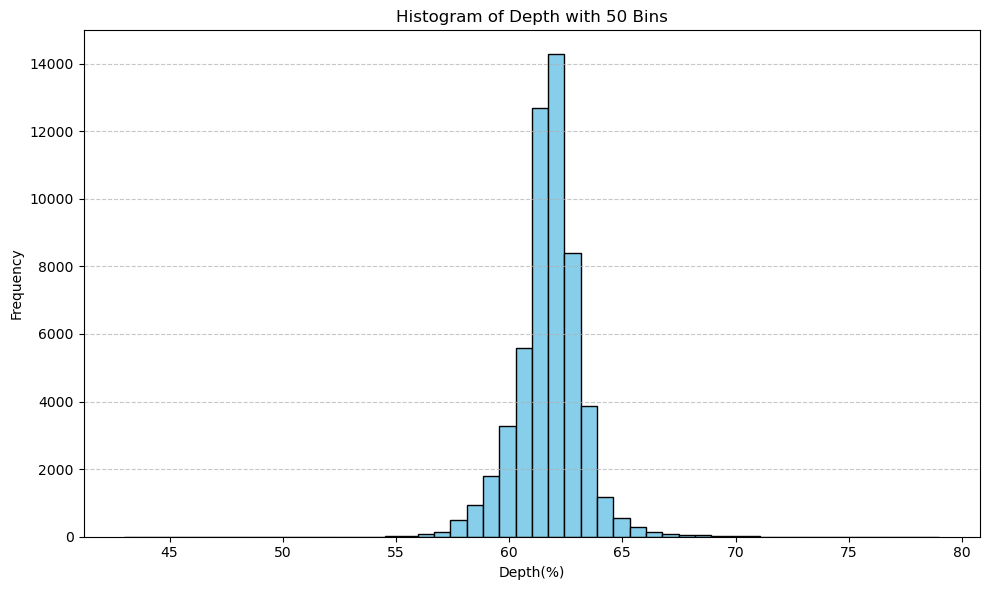

In [75]:
# Create a histogram with a bin size of 50 for the 'depth' attribute
plt.figure(figsize=(10, 6))
plt.hist(data['depth'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Depth(%)')
plt.ylabel('Frequency')
plt.title('Histogram of Depth with 50 Bins')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

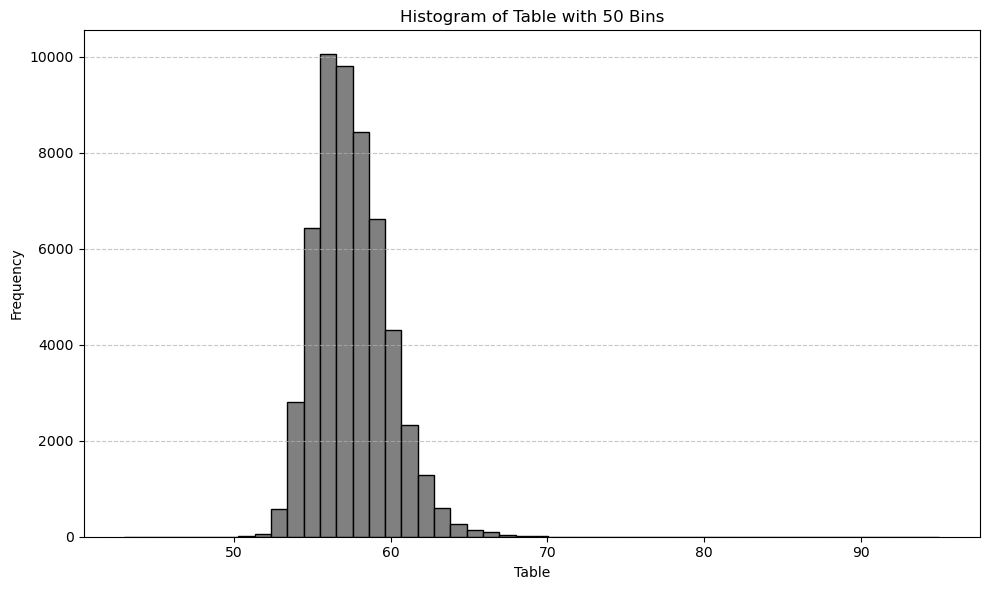

In [76]:
# Create a histogram with a bin size of 50 for the 'table' attribute
plt.figure(figsize=(10, 6))
plt.hist(data['table'], bins=50, color='grey', edgecolor='black')
plt.xlabel('Table')
plt.ylabel('Frequency')
plt.title('Histogram of Table with 50 Bins')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

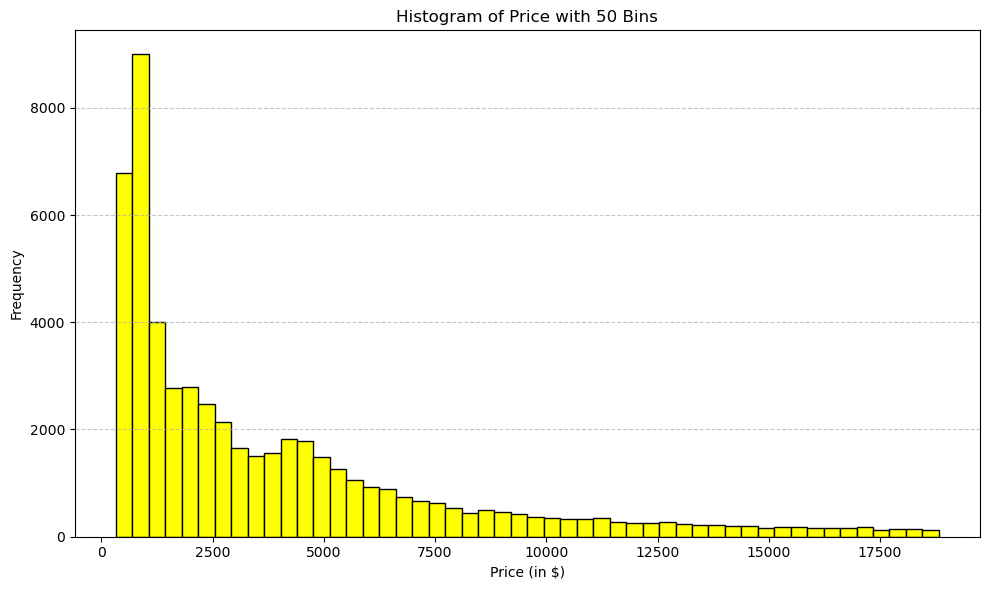

In [77]:
# Create a histogram with a bin size of 50 for the 'price' attribute
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=50, color='yellow', edgecolor='black')
plt.xlabel('Price (in $)')
plt.ylabel('Frequency')
plt.title('Histogram of Price with 50 Bins')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

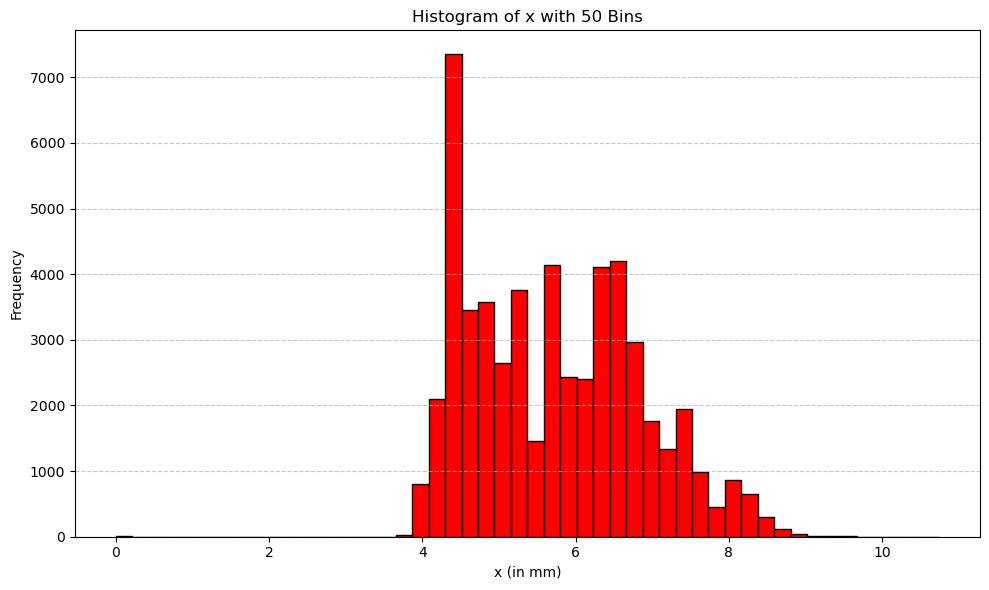

In [78]:
# Create a histogram with a bin size of 50 for the 'x' attribute
plt.figure(figsize=(10, 6))
plt.hist(data["'x'"], bins=50, color='red', edgecolor='black')
plt.xlabel('x (in mm)')
plt.ylabel('Frequency')
plt.title('Histogram of x with 50 Bins')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

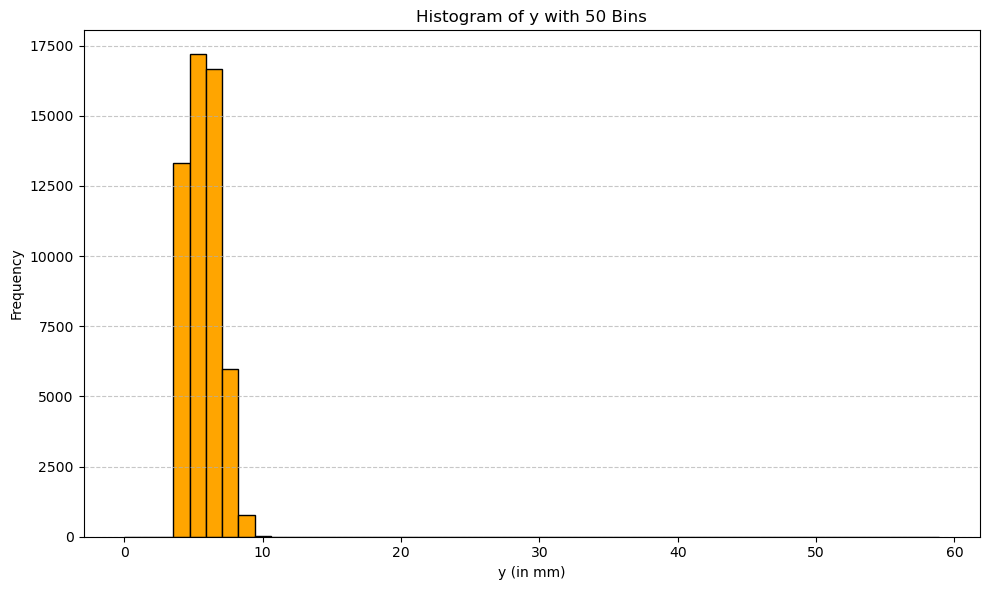

In [79]:
# Create a histogram with a bin size of 50 for the 'y' attribute
plt.figure(figsize=(10, 6))
plt.hist(data["'y'"], bins=50, color='orange', edgecolor='black')
plt.xlabel('y (in mm)')
plt.ylabel('Frequency')
plt.title('Histogram of y with 50 Bins')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

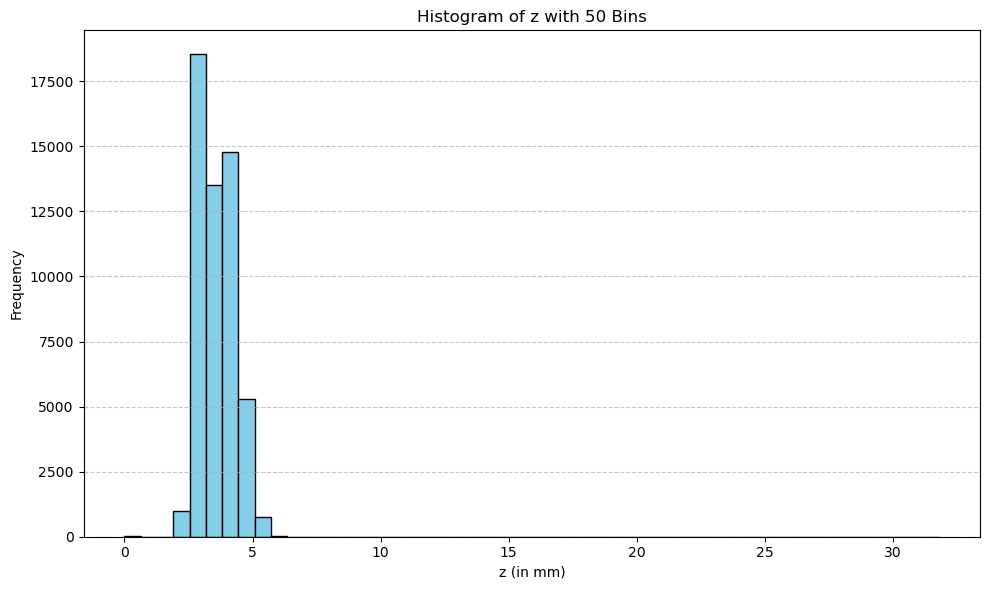

In [80]:
# Create a histogram with a bin size of 50 for the 'z' attribute
plt.figure(figsize=(10, 6))
plt.hist(data["'z'"], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('z (in mm)')
plt.ylabel('Frequency')
plt.title('Histogram of z with 50 Bins')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

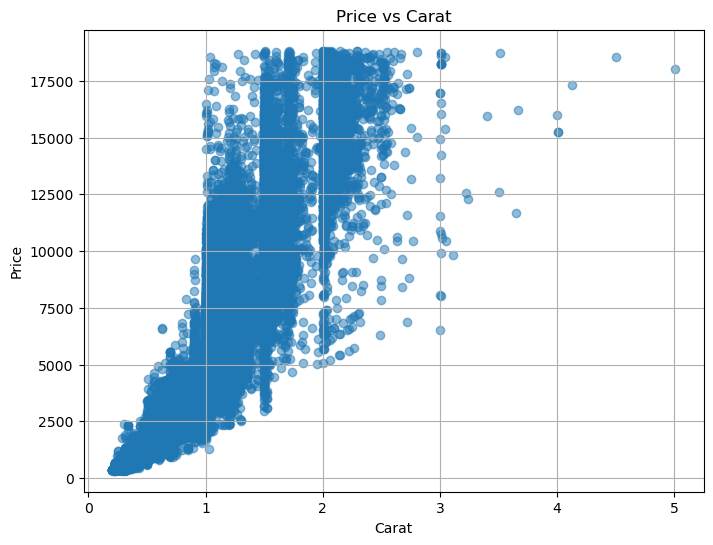

In [81]:
price = data['price']
carat = data['carat']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(carat, price, alpha=0.5) 
plt.title('Price vs Carat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True)

# Show the plot
plt.show()

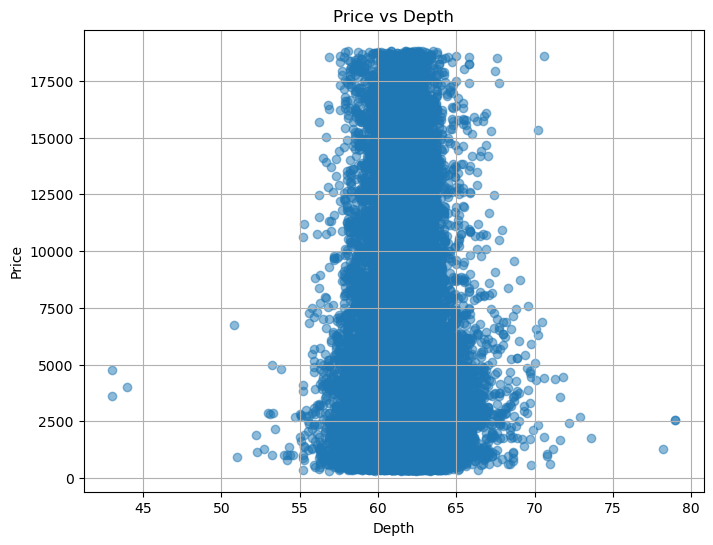

In [82]:
depth = data['depth']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(depth, price, alpha=0.5) 
plt.title('Price vs Depth')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.grid(True)

# Show the plot
plt.show()

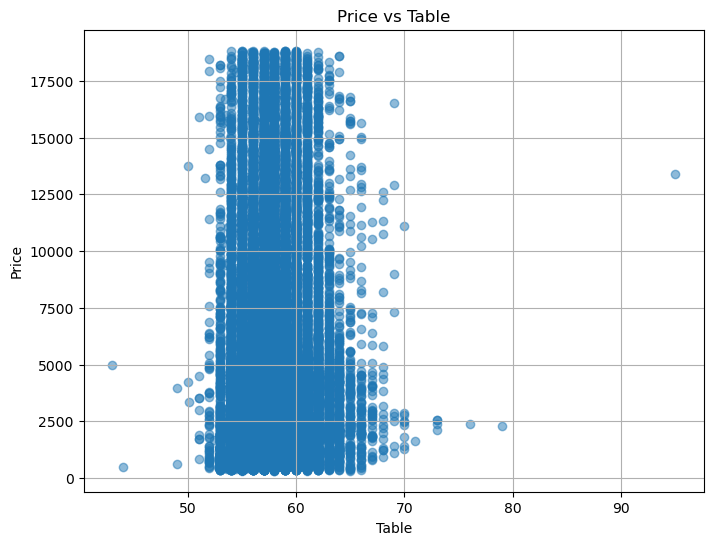

In [83]:
table = data['table']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(table, price, alpha=0.5)  
plt.title('Price vs Table')
plt.xlabel('Table')
plt.ylabel('Price')
plt.grid(True)

# Show the plot
plt.show()

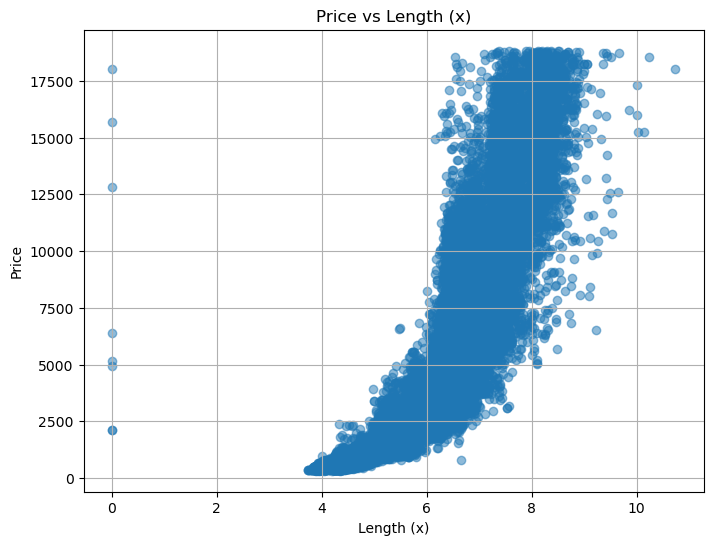

In [84]:
x_value = data["'x'"]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_value, price, alpha=0.5) 
plt.title('Price vs Length (x)')
plt.xlabel('Length (x)')
plt.ylabel('Price')
plt.grid(True)

# Show the plot
plt.show()

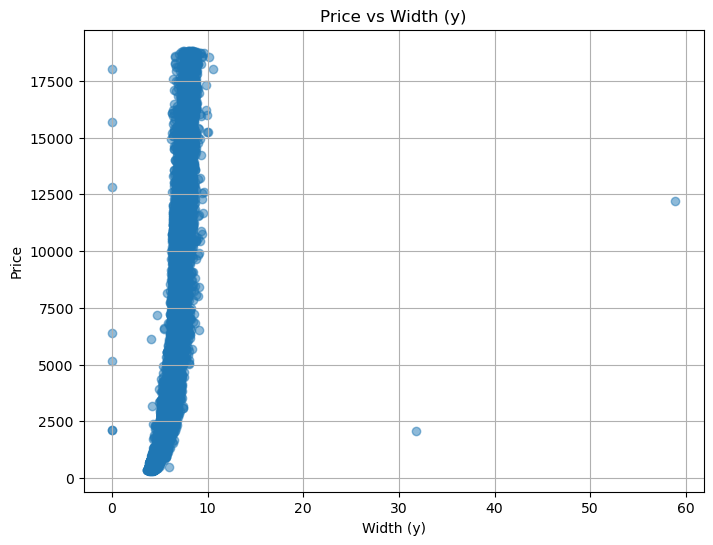

In [85]:
y_value = data["'y'"]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_value, price, alpha=0.5)
plt.title('Price vs Width (y)')
plt.xlabel('Width (y)')
plt.ylabel('Price')
plt.grid(True)

# Show the plot
plt.show()

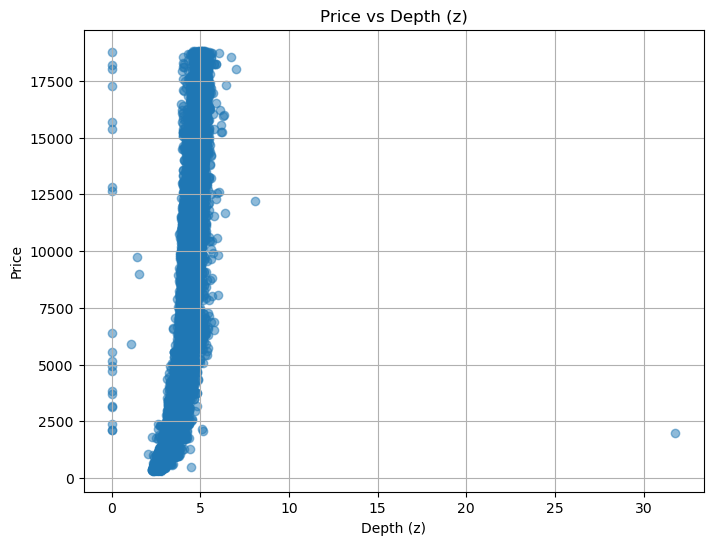

In [86]:
z_value = data["'z'"]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(z_value, price, alpha=0.5)  
plt.title('Price vs Depth (z)')
plt.xlabel('Depth (z)')
plt.ylabel('Price')
plt.grid(True)

# Show the plot
plt.show()

# Data Preprocessing

In [87]:
#Remove Duplicates
print("Before removing duplicates:")
data.shape

Before removing duplicates:


(53940, 10)

In [88]:
data.drop_duplicates(inplace=True)

In [89]:
# Print the duplicate rows after removing to double check
duplicate = data[data.duplicated()]
print("Duplicate Rows :")
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,carat,cut,color,clarity,depth,table,price,'x','y','z'


In [90]:
print("After removing duplicates:")
data.shape

After removing duplicates:


(53794, 10)

In [91]:
#Dropping dimensionless diamond rocords
data = data.drop(data[data["'x'"]==0].index)
data = data.drop(data[data["'y'"]==0].index)
data = data.drop(data[data["'z'"]==0].index)
data.shape

(53775, 10)

In [92]:
import warnings

# Suppress Seaborn warnings
warnings.filterwarnings("ignore")

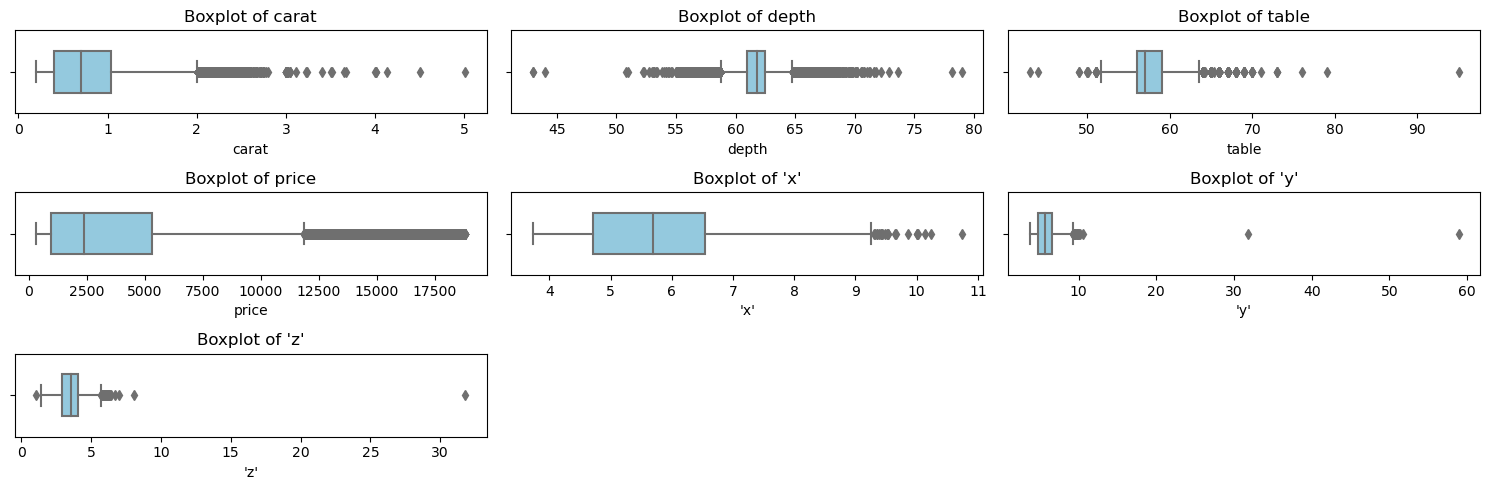

In [93]:
numeric_cols = ["carat", "depth", "table", "price", "'x'", "'y'", "'z'"]

# Calculate the number of rows and columns for subplots
n_cols = 3  # Number of columns
n_rows = (len(numeric_cols) - 1) // n_cols + 1  # Number of rows

# Create subplots only for the necessary number of columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5))

# Flatten the axes array to make it easier to iterate through
axes = axes.flatten()

# Loop through the numerical columns and create boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=data[col], ax=axes[i], orient='v', width=0.5, color='skyblue', fliersize=5)
    axes[i].set_title(f'Boxplot of {col}')

# Remove any empty subplots in the last row
for i in range(len(numeric_cols), n_cols * n_rows):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### Obviously only with observation, we can see that every of the numerical variables are having extreme outliers.These may indicate unreliability of data. However, we should consider their truthfulness before handling them. (E.g., we will be calculating their skewness of data, deciding whether to deal with the outliers or just leave it after consideration)

#### Now checking for the skewness for every each of the numerical features.

In [94]:
# Check the skewness for each columns
for col in numeric_cols:
    skewness = data[col].skew()
    print("Skewness of {}: {}".format(col, skewness))

Skewness of carat: 1.1132176108381227
Skewness of depth: -0.11371107011617339
Skewness of table: 0.7920686095882784
Skewness of price: 1.6182203665466373
Skewness of 'x': 0.39690785208661533
Skewness of 'y': 2.470200340127712
Skewness of 'z': 1.5893087544943625


**Note**: The data is considered normal if the skewness is between -2 to 2 (Hair et al., 2010). 
- If the skewness value of the numerical features is still at this range, then we neither remove or impute the outliers to prevent loss of information, which can affect the accuracy of the model.
- else we have to replace them by lower or upper limit.

Thus, following the inferences, we are going to replace the outliers of attributes 'y' by lower/upper limit as merely removing them will cause large loss in our datasets.

In [95]:
cols_with_outliers = ["'y'"]
q1 = data[cols_with_outliers].quantile(0.25)
q3 = data[cols_with_outliers].quantile(0.75)
iqr = q3 - q1

lower = q1 - (iqr * 1.5)
upper = q3 + (iqr * 1.5)

for col in cols_with_outliers:
    data[col] = data[col].apply(lambda x: lower[col] if x < lower[col] else x)
    data[col] = data[col].apply(lambda x: upper[col] if x > upper[col] else x)

#### After replacing the relevant outliers with the lower and upper limits, we visualize once again the numerical features with boxplot to peek again at the data distribution.

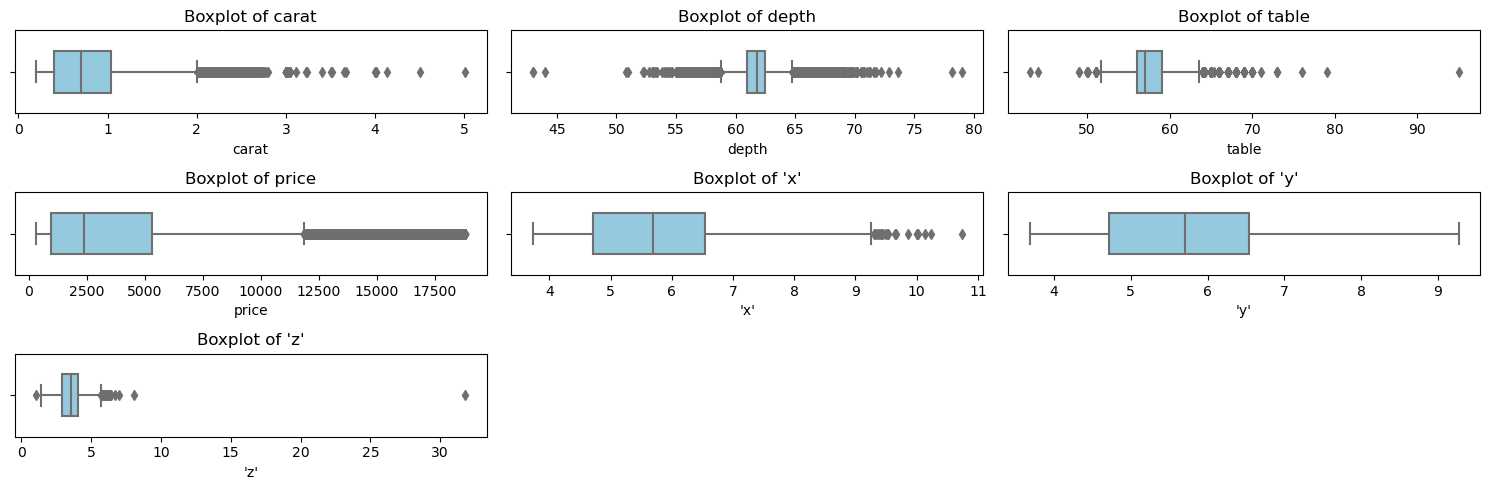

In [96]:
numeric_cols = ["carat", "depth", "table", "price", "'x'", "'y'", "'z'"]

# Calculate the number of rows and columns for subplots
n_cols = 3  # Number of columns
n_rows = (len(numeric_cols) - 1) // n_cols + 1  # Number of rows

# Create subplots only for the necessary number of columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5))

# Flatten the axes array to make it easier to iterate through
axes = axes.flatten()

# Loop through the numerical columns and create boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=data[col], ax=axes[i], orient='v', width=0.5, color='skyblue', fliersize=5)
    axes[i].set_title(f'Boxplot of {col}')

# Remove any empty subplots in the last row
for i in range(len(numeric_cols), n_cols * n_rows):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Handling Categorical Variables

In [97]:
# Get list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [98]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid changing the original data
label_data = data.copy()

# Define custom mappings for each attribute
cut_mapping = {
    "b'Ideal'": 4,
    "b'Premium'": 3,
    "b'Very Good'": 2,
    "b'Good'": 1,
    "b'Fair'": 0
}

color_mapping = {
    "b'D'": 0,
    "b'E'": 1,
    "b'F'": 2,
    "b'G'": 3,
    "b'H'": 4,
    "b'I'": 5,
    "b'J'": 6
}

clarity_mapping = {
    "b'I1'": 0,
    "b'SI2'": 1,
    "b'SI1'": 2,
    "b'VS2'": 3,
    "b'VS1'": 4,
    "b'VVS2'": 5,
    "b'VVS1'": 6,
    "b'IF'": 7
}

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply custom label encoding separately for each attribute
label_data['cut'] = label_encoder.fit_transform(label_data['cut'].map(cut_mapping))
label_data['color'] = label_encoder.fit_transform(label_data['color'].map(color_mapping))
label_data['clarity'] = label_encoder.fit_transform(label_data['clarity'].map(clarity_mapping))

label_data.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,4,1,1,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,3,5,3,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1,6,1,63.3,58.0,335.0,4.34,4.35,2.75


<AxesSubplot:>

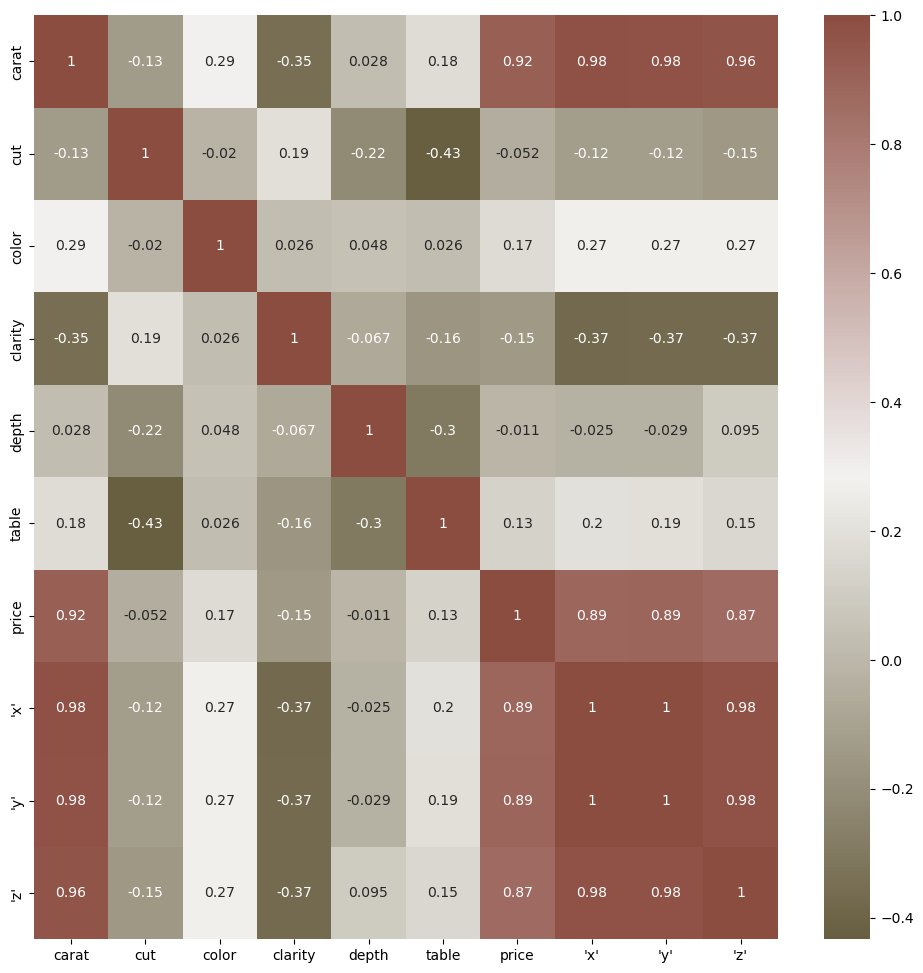

In [99]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [100]:
label_data.corr()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
carat,1.000000,-0.133351,0.290943,-0.352194,0.027889,0.181113,0.921548,0.977857,0.976384,0.961030
cut,-0.133351,1.000000,-0.020149,0.188337,-0.217135,-0.433621,-0.052225,-0.124773,-0.124246,-0.149064
color,0.290943,-0.020149,1.000000,0.025702,0.047654,0.026110,0.171746,0.270228,0.269875,0.269584
clarity,-0.352194,0.188337,0.025702,1.000000,-0.067400,-0.159951,-0.146124,-0.372290,-0.366851,-0.369669
depth,0.027889,-0.217135,0.047654,-0.067400,1.000000,-0.297580,-0.011144,-0.025224,-0.028526,0.094678
table,0.181113,-0.433621,0.026110,-0.159951,-0.297580,1.000000,0.126666,0.195451,0.189159,0.151683
price,0.921548,-0.052225,0.171746,-0.146124,-0.011144,0.126666,1.000000,0.887137,0.888608,0.868030
'x',0.977857,-0.124773,0.270228,-0.372290,-0.025224,0.195451,0.887137,1.000000,0.998470,0.975382
'y',0.976384,-0.124246,0.269875,-0.366851,-0.028526,0.189159,0.888608,0.998470,1.000000,0.975131
'z',0.961030,-0.149064,0.269584,-0.369669,0.094678,0.151683,0.868030,0.975382,0.975131,1.000000


### It can be seen that attributes of cut, color, clarity, depth and table has low correlation. So, we are going to remove these attributes after spilting the data.

## Split the dataset into training and testing 

In [101]:
# Assigning the featurs as X and target as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

# Scaling

In [102]:
scaler = StandardScaler()

In [103]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
# Create dictionaries to store results for each model
results = {
    "Model": [],
    "R^2": [],
    "Adjusted R^2": [],
    "MAE": [],
    "MSE": [],
    "RMSE": [],
}

## Decision Tree

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, r2_score

# Define a custom scorer for R-squared
r2_scorer = make_scorer(score_func=r2_score, greater_is_better=True)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()

# Create a GridSearchCV object with R-squared scoring
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, scoring=r2_scorer, cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best hyperparameters
best_params = grid_search.best_params_

# Create a new Decision Tree Regressor with the best hyperparameters
best_dt_regressor = DecisionTreeRegressor(**best_params)

# Fit the model on the training data with the best hyperparameters
best_dt_regressor.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=4)

In [106]:
#Predict on the training and test data
pred_train = best_dt_regressor.predict(X_train_scaled)
pred_test = best_dt_regressor.predict(X_test_scaled)

# Calculate R-squared for training and test data
r2_train = metrics.r2_score(y_train, pred_train)
r2_test = metrics.r2_score(y_test, pred_test)

# Print the R-squared values for both training and test data
print("R-squared (Training):", r2_train)
print("R-squared (Test):", r2_test)

R-squared (Training): 0.9819260532967826
R-squared (Test): 0.9747191282720484


In [107]:
# Calculate metrics
r2_DT = metrics.r2_score(y_test, pred_test)
adjusted_r2_DT = 1 - (1 - r2_DT) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)
mae_DT = metrics.mean_absolute_error(y_test, pred_test)
mse_DT = metrics.mean_squared_error(y_test, pred_test)
rmse_DT = np.sqrt(mse_DT)

# Store results in the dictionary
results["Model"].append("Decision Tree")
results["R^2"].append(r2_DT)
results["Adjusted R^2"].append(adjusted_r2_DT)
results["MAE"].append(mae_DT)
results["MSE"].append(mse_DT)
results["RMSE"].append(rmse_DT)

# Print the formatted results
print(f"R^2: {r2_DT:.4f}")
print(f"Adjusted R^2: {adjusted_r2_DT:.4f}")
print(f"MAE: {mae_DT:.4f}")
print(f"MSE: {mse_DT:.4f}")
print(f"RMSE: {rmse_DT:.4f}")


R^2: 0.9747
Adjusted R^2: 0.9747
MAE: 338.1754
MSE: 402965.3479
RMSE: 634.7955


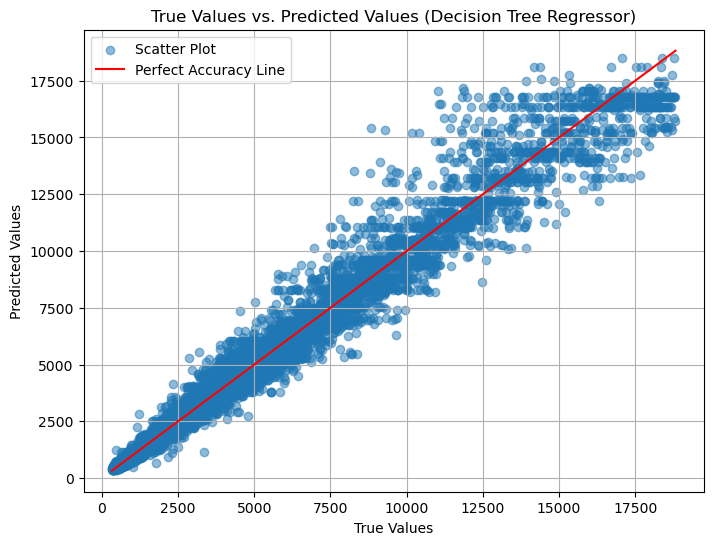

In [108]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_test, alpha=0.5, label='Scatter Plot')

# Plot a diagonal line representing perfect accuracy
max_val = max(max(y_test), max(pred_test))
min_val = min(min(y_test), min(pred_test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', label='Perfect Accuracy Line')

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values (Decision Tree Regressor)")
plt.grid(True)
plt.legend()
plt.show()


## Random Forest

In [109]:
from sklearn.ensemble import RandomForestRegressor

# 1. Choose model class
model_randomForest = RandomForestRegressor()

# 2. Instantiate and fit model to data
model_randomForest.fit(X_train_scaled, y_train)

# 3. Predict on training and test data
pred_train = model_randomForest.predict(X_train_scaled)
pred_test = model_randomForest.predict(X_test_scaled)

# Calculate R-squared for training and test data
r2_train = metrics.r2_score(y_train, pred_train)
r2_test = metrics.r2_score(y_test, pred_test)

# Print the R-squared values for both training and test data
print("R-squared (Training):", r2_train)
print("R-squared (Test):", r2_test)

R-squared (Training): 0.9974319637371477
R-squared (Test): 0.9813441268661471


In [110]:
# Calculate metrics
r2_RF = metrics.r2_score(y_test, pred_test)
adjusted_r2_RF = 1 - (1 - r2_RF) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)
mae_RF = metrics.mean_absolute_error(y_test, pred_test)
mse_RF = metrics.mean_squared_error(y_test, pred_test)
rmse_RF = np.sqrt(mse_RF)

# Store results in the dictionary
results["Model"].append("Random Forest")
results["R^2"].append(r2_RF)
results["Adjusted R^2"].append(adjusted_r2_RF)
results["MAE"].append(mae_RF)
results["MSE"].append(mse_RF)
results["RMSE"].append(rmse_RF)

# Print the formatted results
print(f"R^2: {r2_RF:.4f}")
print(f"Adjusted R^2: {adjusted_r2_RF:.4f}")
print(f"MAE: {mae_RF:.4f}")
print(f"MSE: {mse_RF:.4f}")
print(f"RMSE: {rmse_RF:.4f}")

R^2: 0.9813
Adjusted R^2: 0.9813
MAE: 270.8027
MSE: 297365.9488
RMSE: 545.3127


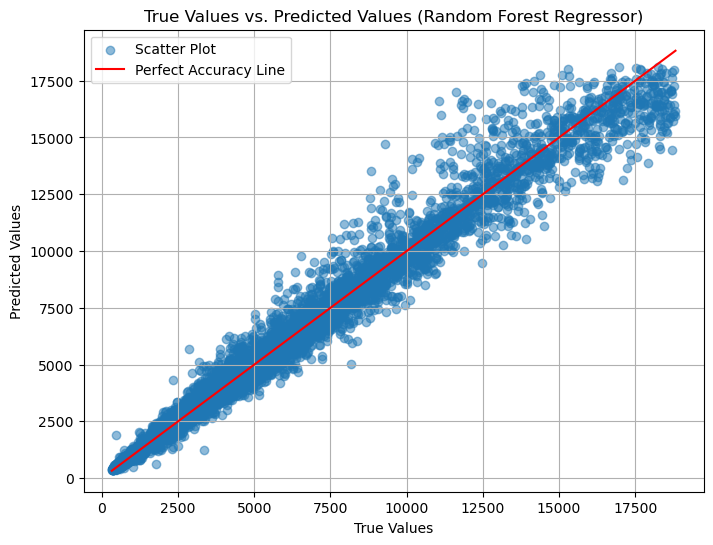

In [111]:

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_test, alpha=0.5, label='Scatter Plot')

# Plot a diagonal line representing perfect accuracy
max_val = max(max(y_test), max(pred_test))
min_val = min(min(y_test), min(pred_test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', label='Perfect Accuracy Line')

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values (Random Forest Regressor)")
plt.grid(True)
plt.legend()
plt.show()

## Gradient Boosting Regressor

In [112]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=7)

# Fit the model to the training data
gb_model.fit(X_train_scaled,y_train)

# 3. Predict on training and test data
pred_train = gb_model.predict(X_train_scaled)
pred_test = gb_model.predict(X_test_scaled)

# Calculate R-squared for training and test data
r2_train = metrics.r2_score(y_train, pred_train)
r2_test = metrics.r2_score(y_test, pred_test)

# Print the R-squared values for both training and test data
print("R-squared (Training):", r2_train)
print("R-squared (Test):", r2_test)

R-squared (Training): 0.985045205519413
R-squared (Test): 0.9808255991091915


In [113]:
# Calculate metrics
r2_GB = metrics.r2_score(y_test, pred_test)
adjusted_r2_GB = 1 - (1 - r2_GB) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)
mae_GB = metrics.mean_absolute_error(y_test, pred_test)
mse_GB = metrics.mean_squared_error(y_test, pred_test)
rmse_GB = np.sqrt(mse_GB)

# Store results in the dictionary
results["Model"].append("Gradient Boosting")
results["R^2"].append(r2_GB)
results["Adjusted R^2"].append(adjusted_r2_GB)
results["MAE"].append(mae_GB)
results["MSE"].append(mse_GB)
results["RMSE"].append(rmse_GB)

# Print the formatted results
print(f"R^2: {r2_GB:.4f}")
print(f"Adjusted R^2: {adjusted_r2_GB:.4f}")
print(f"MAE: {mae_GB:.4f}")
print(f"MSE: {mse_GB:.4f}")
print(f"RMSE: {rmse_GB:.4f}")

R^2: 0.9808
Adjusted R^2: 0.9808
MAE: 301.7505
MSE: 305631.0403
RMSE: 552.8391


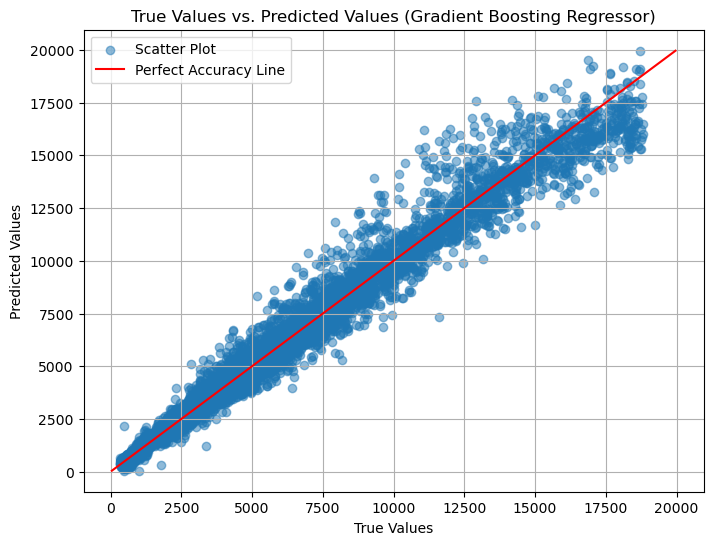

In [114]:

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_test, alpha=0.5, label='Scatter Plot')

# Plot a diagonal line representing perfect accuracy
max_val = max(max(y_test), max(pred_test))
min_val = min(min(y_test), min(pred_test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', label='Perfect Accuracy Line')

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values (Gradient Boosting Regressor)")
plt.grid(True)
plt.legend()
plt.show()

## K Neighbors

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor


# Create a new K Neighbors Regressor with the best k value
best_knn_model = KNeighborsRegressor(13)

# Fit the model on the training data with the best k value
best_knn_model.fit(X_train_scaled, y_train)

# 3. Predict on training and test data
pred_train = best_knn_model.predict(X_train_scaled)
pred_test = best_knn_model.predict(X_test_scaled)

# Calculate R-squared for training and test data
r2_train = metrics.r2_score(y_train, pred_train)
r2_test = metrics.r2_score(y_test, pred_test)

# Print the R-squared values for both training and test data
print("R-squared (Training):", r2_train)
print("R-squared (Test):", r2_test)


R-squared (Training): 0.973238071178297
R-squared (Test): 0.9691451837399503


In [116]:
# Calculate metrics
r2_KNN = metrics.r2_score(y_test, pred_test)
adjusted_r2_KNN = 1 - (1 - r2_KNN) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)
mae_KNN = metrics.mean_absolute_error(y_test, pred_test)
mse_KNN = metrics.mean_squared_error(y_test, pred_test)
rmse_KNN = np.sqrt(mse_KNN)

# Store results in the dictionary
results["Model"].append("K Neighbors")
results["R^2"].append(r2_KNN)
results["Adjusted R^2"].append(adjusted_r2_KNN)
results["MAE"].append(mae_KNN)
results["MSE"].append(mse_KNN)
results["RMSE"].append(rmse_KNN)

# Print the formatted results
print(f"R^2: {r2_KNN:.4f}")
print(f"Adjusted R^2: {adjusted_r2_KNN:.4f}")
print(f"MAE: {mae_KNN:.4f}")
print(f"MSE: {mse_KNN:.4f}")
print(f"RMSE: {rmse_KNN:.4f}")

R^2: 0.9691
Adjusted R^2: 0.9691
MAE: 370.9868
MSE: 491811.4337
RMSE: 701.2927


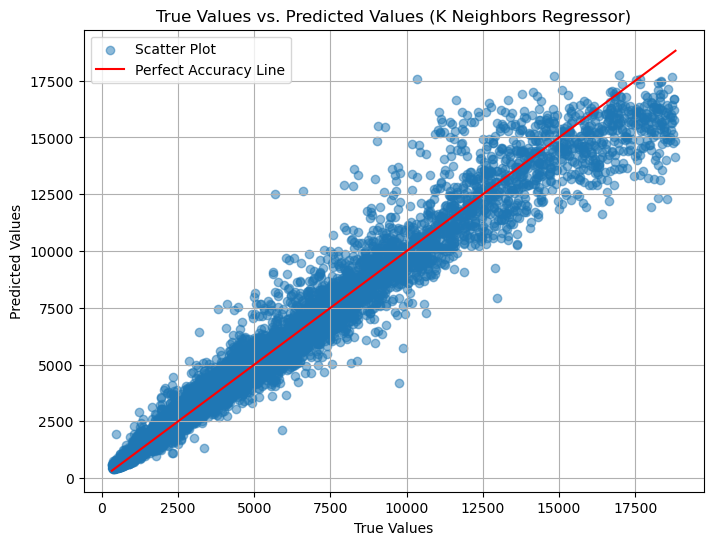

In [117]:

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_test, alpha=0.5, label='Scatter Plot')

# Plot a diagonal line representing perfect accuracy
max_val = max(max(y_test), max(pred_test))
min_val = min(min(y_test), min(pred_test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', label='Perfect Accuracy Line')

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values (K Neighbors Regressor)")
plt.grid(True)
plt.legend()
plt.show()

In [118]:
# Create a DataFrame from the results dictionary
from tabulate import tabulate
results_df = pd.DataFrame(results)
results_df.index = range(1, len(results_df) + 1)
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 2000)

# Display the results table
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))

╒════╤═══════════════════╤══════════╤════════════════╤═════════╤════════╤═════════╕
│    │ Model             │      R^2 │   Adjusted R^2 │     MAE │    MSE │    RMSE │
╞════╪═══════════════════╪══════════╪════════════════╪═════════╪════════╪═════════╡
│  1 │ Decision Tree     │ 0.974719 │       0.974702 │ 338.175 │ 402965 │ 634.796 │
├────┼───────────────────┼──────────┼────────────────┼─────────┼────────┼─────────┤
│  2 │ Random Forest     │ 0.981344 │       0.981332 │ 270.803 │ 297366 │ 545.313 │
├────┼───────────────────┼──────────┼────────────────┼─────────┼────────┼─────────┤
│  3 │ Gradient Boosting │ 0.980826 │       0.980813 │ 301.751 │ 305631 │ 552.839 │
├────┼───────────────────┼──────────┼────────────────┼─────────┼────────┼─────────┤
│  4 │ K Neighbors       │ 0.969145 │       0.969125 │ 370.987 │ 491811 │ 701.293 │
╘════╧═══════════════════╧══════════╧════════════════╧═════════╧════════╧═════════╛


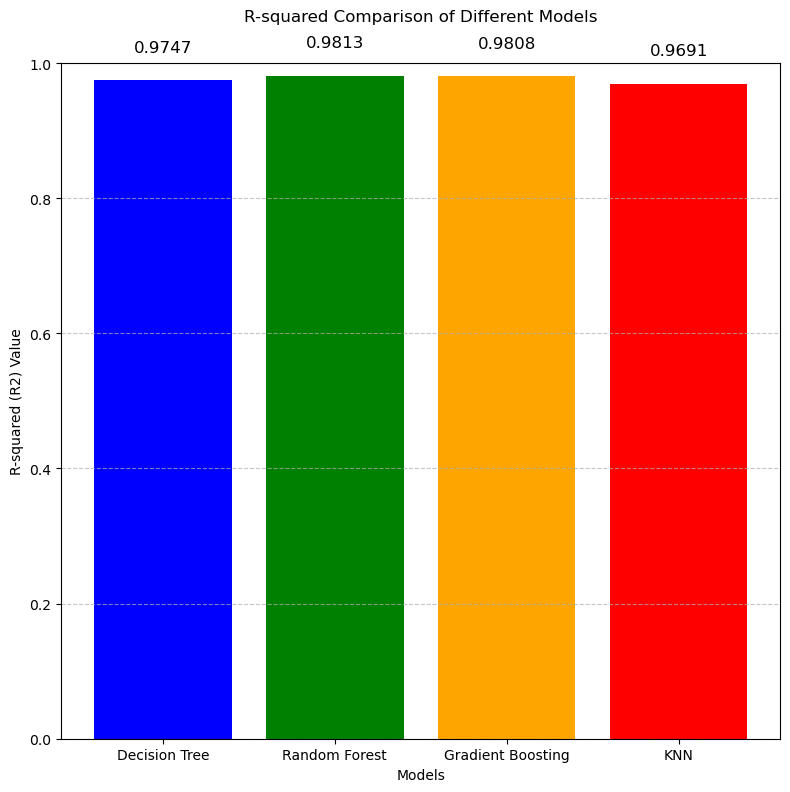

In [119]:
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN']
r2_values = [r2_DT, r2_RF, r2_GB, r2_KNN]  
plt.figure(figsize=(8, 8))  
plt.bar(models, r2_values, color=['blue', 'green', 'orange', 'red'])
plt.title('R-squared Comparison of Different Models', y=1.05)
plt.xlabel('Models')
plt.ylabel('R-squared (R2) Value')
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, r2 in zip(plt.gca().patches, r2_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.06, f'{r2:.4f}', ha='center', va='top', fontsize=12)

plt.tight_layout()
plt.show()

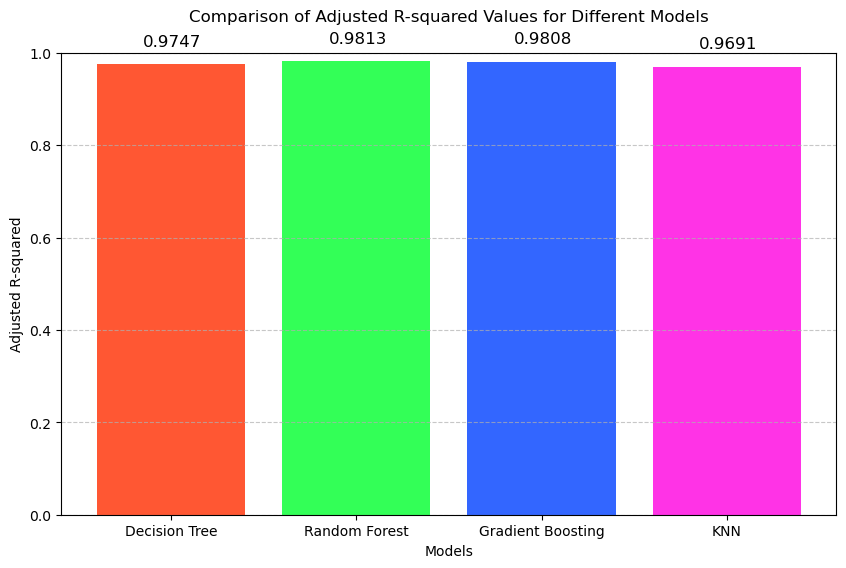

In [120]:
adjusted_r2_values = [adjusted_r2_DT, adjusted_r2_RF, adjusted_r2_GB, adjusted_r2_KNN]
colors = ['#FF5733', '#33FF57', '#3366FF', '#FF33E6']
plt.figure(figsize=(10, 6))
bars = plt.bar(models, adjusted_r2_values, color=colors)
plt.title('Comparison of Adjusted R-squared Values for Different Models', y=1.05)
plt.xlabel('Models')
plt.ylabel('Adjusted R-squared')
plt.ylim(0, 1) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar, value in zip(bars, adjusted_r2_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.04, f'{value:.4f}', fontsize=12)

plt.show()


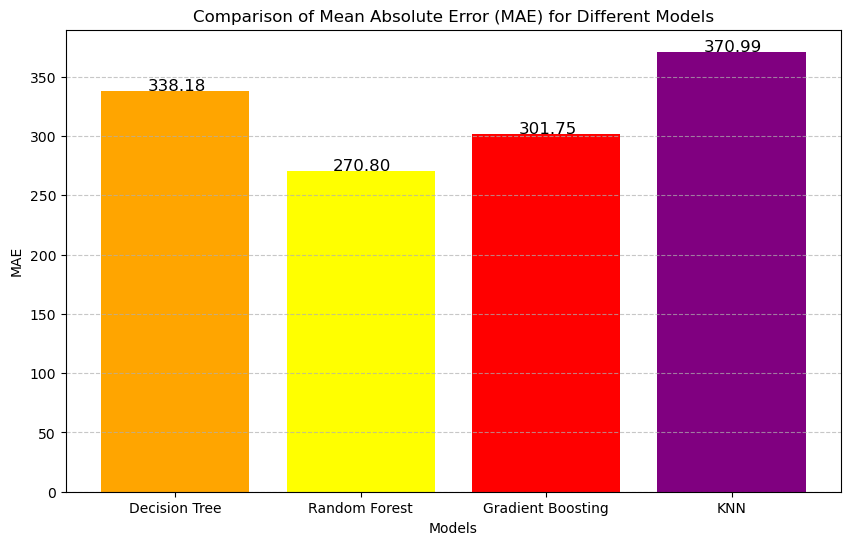

In [121]:
mae_values = [mae_DT, mae_RF, mae_GB, mae_KNN]
colors = ['orange', 'yellow', 'red', 'purple']
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mae_values, color=colors)
plt.title('Comparison of Mean Absolute Error (MAE) for Different Models')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, value in zip(bars, mae_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.05, f'{value:.2f}', fontsize=12)
plt.show()

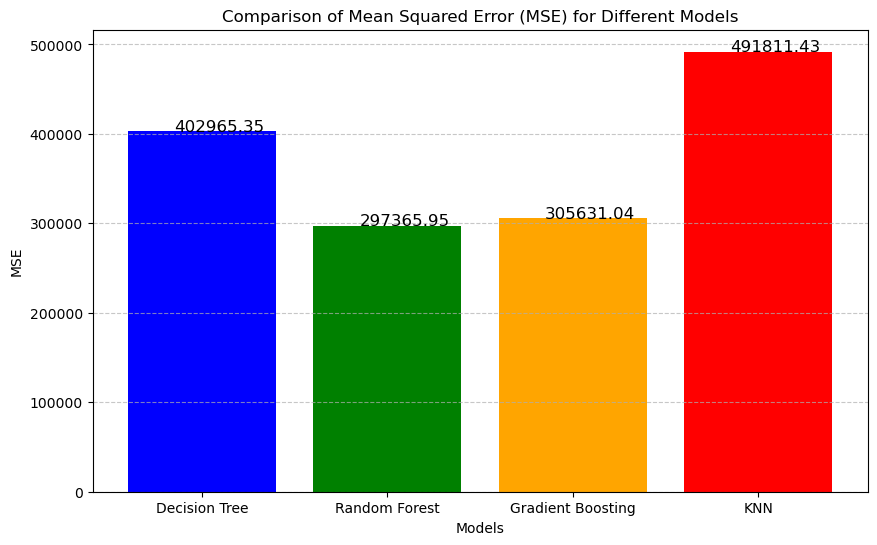

In [122]:
mse_values = [mse_DT, mse_RF, mse_GB, mse_KNN]
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mse_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Comparison of Mean Squared Error (MSE) for Different Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar, value in zip(bars, mse_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.05, f'{value:.2f}', fontsize=12)

plt.show()

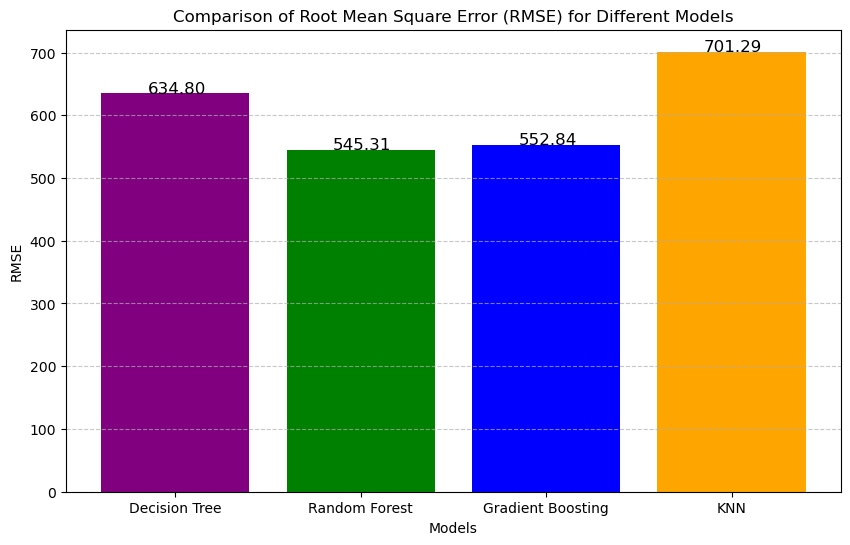

In [123]:
rmse_values = [rmse_DT, rmse_RF, rmse_GB, rmse_KNN]
colors = ['purple', 'green', 'blue', 'orange']
plt.figure(figsize=(10, 6))
bars = plt.bar(models, rmse_values, color=colors)
plt.title('Comparison of Root Mean Square Error (RMSE) for Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar, value in zip(bars, rmse_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.05, f'{value:.2f}', fontsize=12)

plt.show()

In [ ]:
def validate_numeric_input(prompt, min_value=None, max_value=None):
    while True:
        try:
            value = float(input(prompt))
            if (min_value is None or value >= min_value) and (max_value is None or value <= max_value):
                return value
            else:
                if min_value is not None and max_value is not None:
                    print(f"Invalid input. Please enter a numerical value between {min_value}-{max_value}.")
                elif min_value is not None:
                    print(f"Invalid input. Please enter a numerical value greater than or equal to {min_value}.")
                elif max_value is not None:
                    print(f"Invalid input. Please enter a numerical value less than or equal to {max_value}.")
        except ValueError:
            print("Invalid input. Please enter a numerical value.")

def validate_categorical_input(prompt, valid_values):
    valid_range = f"({min(valid_values)}-{max(valid_values)})"
    while True:
        try:
            value = int(input(prompt))
            if value in valid_values:
                return value
            else:
                print(f"Invalid input. Please choose a number within the valid range {valid_range}.")
        except ValueError:
            print(f"Invalid input. Please enter a numerical value within the valid range {valid_range}.")

def predict_price():
    # Prompt the user for input values
    carat = validate_numeric_input("Enter carat: ")
    
    # Define valid ranges for cut, color, and clarity
    cut_options = {0: "Fair", 1: "Good", 2: "Very Good", 3: "Premium", 4: "Ideal"}
    color_options = {0: "D", 1: "E", 2: "F", 3: "G", 4: "H", 5: "I", 6: "J"}
    clarity_options = {0: "I1", 1: "SI2", 2: "SI1", 3: "VS2", 4: "VS1", 5: "VVS2", 6: "VVS1", 7: "IF"}
    
    # Prompt the user for categorical values with corresponding numeric options
    cut_num = validate_categorical_input(f"Enter cut {cut_options}: ", cut_options.keys())
    color_num = validate_categorical_input(f"Enter color {color_options}: ", color_options.keys())
    clarity_num = validate_categorical_input(f"Enter clarity {clarity_options}: ", clarity_options.keys())
    
    depth = validate_numeric_input("Enter depth: ")
    table = validate_numeric_input("Enter table: ")
    x = validate_numeric_input("Enter x: ")
    y = validate_numeric_input("Enter y: ")
    z = validate_numeric_input("Enter z: ")

    # Create a dictionary with the user input
    input_data = {
        'carat': [carat],
        'cut': [cut_num],
        'color': [color_num],
        'clarity': [clarity_num],
        'depth': [depth],
        'table': [table],
        "'x'": [x],
        "'y'": [y],
        "'z'": [z]
    }

    # Create a DataFrame from the input data
    input_df = pd.DataFrame(input_data)
    
    input_scaled = scaler.transform(input_df)
    
    # Make the price prediction
    predicted_price = model_randomForest.predict(input_scaled)

    # Print the predicted price and input DataFrame
    print("Predicted Price:$",predicted_price[0])
#     print(input_df)

# Call the function to predict the price based on user input
predict_price()


In [63]:
label_data.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,4,1,1,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,3,5,3,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1,6,1,63.3,58.0,335.0,4.34,4.35,2.75
